In [1]:
# Import important libraries
import numpy as np
import pandas as pd

# Import important libraries for visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# display all columns
pd.set_option('display.max_columns',None)

# Import libraries for handling categorical data
from sklearn.preprocessing import LabelEncoder

from scipy import stats
from scipy.stats import uniform

# Import libraries to handle scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Libraries to split data into train and test data
from sklearn.model_selection import train_test_split

# Libraries to evaluate model
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,classification_report

# Imoport models algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

C:\Users\PRATIK KALE\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import library to connect mysql
import mysql.connector
connect = mysql.connector.connect(host='18.136.157.135',
                                    user='dm_team3',
                                    password='DM!$!Team!27@9!20&',
                                    database='project_telecom',
                                    auth_plugin='mysql_native_password')

In [3]:
database ='select * from telecom_churn_data'
df=pd.read_sql(database,connect)
df

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [4]:
new_column_names = ['State', 'Account_Length', 'Area_Code', 'Phone',
'International_Plan', 'VMail_Plan', 'VMail_Message',
'Day_Mins', 'Day_Calls', 'Day_Charge',
'Eve_Mins', 'Eve_Calls', 'Eve_Charge',
'Night_Mins', 'Night_Calls', 'Night_Charge',
'International_Mins', 'International_calls',
'International_Charge', 'CustServ_Calls', 'Churn']

In [5]:
df.columns =new_column_names

In [6]:
df.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'International_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

# Basic checks

In [7]:
df.shape

(4617, 21)

In [8]:
df.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
df.tail()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.8,126.8,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account_Length        4617 non-null   object
 2   Area_Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International_Plan    4617 non-null   object
 5   VMail_Plan            4617 non-null   object
 6   VMail_Message         4617 non-null   object
 7   Day_Mins              4617 non-null   object
 8   Day_Calls             4617 non-null   object
 9   Day_Charge            4617 non-null   object
 10  Eve_Mins              4617 non-null   object
 11  Eve_Calls             4617 non-null   object
 12  Eve_Charge            4617 non-null   object
 13  Night_Mins            4617 non-null   object
 14  Night_Calls           4617 non-null   object
 15  Night_Charge          4617 non-null   

In [11]:
df.drop('Phone',axis=1,inplace=True)

In [12]:
df.nunique()

State                     51
Account_Length           218
Area_Code                  3
International_Plan         2
VMail_Plan                 2
VMail_Message             47
Day_Mins                1901
Day_Calls                123
Day_Charge              1901
Eve_Mins                1833
Eve_Calls                125
Eve_Charge              1621
Night_Mins              1813
Night_Calls              130
Night_Charge            1012
International_Mins       168
International_calls       21
International_Charge     168
CustServ_Calls            10
Churn                      2
dtype: int64

# Preprocessing

In [13]:
df.isna().sum()

State                   0
Account_Length          0
Area_Code               0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

In [14]:
df.duplicated().sum()

0

## 1)State

In [15]:
df.State.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [16]:
len(df.State.unique())

51

In [17]:
print(df['State'].value_counts())

State
WV    149
AL    114
MN    112
OH    110
ID    110
VA    109
NY    109
OR    107
NJ    106
WY    106
TX    105
UT    104
WI     99
MI     98
MA     97
KS     96
VT     95
ME     95
CT     92
MD     92
MT     92
MS     91
NH     91
CO     91
KY     90
RI     90
NV     89
IN     89
DE     89
WA     89
FL     85
NM     84
MO     84
SC     83
NC     83
TN     83
DC     82
AZ     81
ND     80
OK     80
HI     79
NE     79
IL     79
AR     77
GA     77
SD     76
LA     73
AK     69
PA     68
IA     65
CA     44
Name: count, dtype: int64


In [18]:
le =LabelEncoder()
df['State']=le.fit_transform(df.State)
df['State']

0       16
1       35
2       31
3       35
4       36
        ..
4612    34
4613    32
4614    46
4615    22
4616    15
Name: State, Length: 4617, dtype: int32

## 2) account length

In [19]:
df.Account_Length

0       128
1       107
2       137
3        84
4        75
       ... 
4612     57
4613    177
4614     67
4615     98
4616    140
Name: Account_Length, Length: 4617, dtype: object

In [20]:
df.Account_Length =df.Account_Length.astype('int32')
df.Account_Length

0       128
1       107
2       137
3        84
4        75
       ... 
4612     57
4613    177
4614     67
4615     98
4616    140
Name: Account_Length, Length: 4617, dtype: int32

## 3) Area_code

In [21]:
df.Area_Code

0       415
1       415
2       415
3       408
4       415
       ... 
4612    510
4613    408
4614    408
4615    415
4616    415
Name: Area_Code, Length: 4617, dtype: object

In [22]:
df.Area_Code =df.Area_Code.astype('int32')
df.Area_Code

0       415
1       415
2       415
3       408
4       415
       ... 
4612    510
4613    408
4614    408
4615    415
4616    415
Name: Area_Code, Length: 4617, dtype: int32

## 4) International_Plan

In [23]:
df.International_Plan

0         no
1         no
2         no
3        yes
4        yes
        ... 
4612      no
4613      no
4614      no
4615      no
4616      no
Name: International_Plan, Length: 4617, dtype: object

In [24]:
df.International_Plan =le.fit_transform(df.International_Plan)
df.International_Plan

0       0
1       0
2       0
3       1
4       1
       ..
4612    0
4613    0
4614    0
4615    0
4616    0
Name: International_Plan, Length: 4617, dtype: int32

## 5) VMail_Plan

In [25]:
df.VMail_Plan

0        yes
1        yes
2         no
3         no
4         no
        ... 
4612     yes
4613     yes
4614     yes
4615     yes
4616      no
Name: VMail_Plan, Length: 4617, dtype: object

In [26]:
df.VMail_Plan =le.fit_transform(df.VMail_Plan)
df.VMail_Plan

0       1
1       1
2       0
3       0
4       0
       ..
4612    1
4613    1
4614    1
4615    1
4616    0
Name: VMail_Plan, Length: 4617, dtype: int32

## 6) VMail_Message

In [27]:
df.VMail_Message

0       25
1       26
2        0
3        0
4        0
        ..
4612    25
4613    29
4614    33
4615    23
4616     0
Name: VMail_Message, Length: 4617, dtype: object

In [28]:
df.VMail_Message =df.VMail_Message.astype('int32')
df.VMail_Message

0       25
1       26
2        0
3        0
4        0
        ..
4612    25
4613    29
4614    33
4615    23
4616     0
Name: VMail_Message, Length: 4617, dtype: int32

## 7) Day_Mins

In [29]:
df.Day_Mins

0       265.1
1       161.6
2       243.4
3       299.4
4       166.7
        ...  
4612      144
4613      189
4614    127.5
4615    168.9
4616    204.7
Name: Day_Mins, Length: 4617, dtype: object

In [30]:
df.Day_Mins =df.Day_Mins.astype('float32')
df.Day_Mins

0       265.100006
1       161.600006
2       243.399994
3       299.399994
4       166.699997
           ...    
4612    144.000000
4613    189.000000
4614    127.500000
4615    168.899994
4616    204.699997
Name: Day_Mins, Length: 4617, dtype: float32

## 8) Day_Calls

In [31]:
df.Day_Calls

0       110
1       123
2       114
3        71
4       113
       ... 
4612     81
4613     91
4614    126
4615     98
4616    100
Name: Day_Calls, Length: 4617, dtype: object

In [32]:
df.Day_Calls =df.Day_Calls.astype('int32')
df.Day_Calls

0       110
1       123
2       114
3        71
4       113
       ... 
4612     81
4613     91
4614    126
4615     98
4616    100
Name: Day_Calls, Length: 4617, dtype: int32

## 9)Day_Charge

In [33]:
df.Day_Charge

0       45.07
1       27.47
2       41.38
3        50.9
4       28.34
        ...  
4612    24.48
4613    32.13
4614    21.68
4615    28.71
4616     34.8
Name: Day_Charge, Length: 4617, dtype: object

In [34]:
df.Day_Charge =df.Day_Charge.astype('float32')
df.Day_Charge

0       45.070000
1       27.469999
2       41.380001
3       50.900002
4       28.340000
          ...    
4612    24.480000
4613    32.130001
4614    21.680000
4615    28.709999
4616    34.799999
Name: Day_Charge, Length: 4617, dtype: float32

## 10)Eve_Mins

In [35]:
df.Eve_Mins

0       197.4
1       195.5
2       121.2
3        61.9
4       148.3
        ...  
4612    187.2
4613    303.1
4614    296.1
4615    226.3
4616    126.8
Name: Eve_Mins, Length: 4617, dtype: object

In [36]:
df.Eve_Mins =df.Eve_Mins.astype('float32')
df.Eve_Mins

0       197.399994
1       195.500000
2       121.199997
3        61.900002
4       148.300003
           ...    
4612    187.199997
4613    303.100006
4614    296.100006
4615    226.300003
4616    126.800003
Name: Eve_Mins, Length: 4617, dtype: float32

## 11)Eve_Calls

In [37]:
df.Eve_Calls

0        99
1       103
2       110
3        88
4       122
       ... 
4612    112
4613     96
4614    129
4615    117
4616    107
Name: Eve_Calls, Length: 4617, dtype: object

In [38]:
df.Eve_Calls =df.Eve_Calls.astype('int32')
df.Eve_Calls

0        99
1       103
2       110
3        88
4       122
       ... 
4612    112
4613     96
4614    129
4615    117
4616    107
Name: Eve_Calls, Length: 4617, dtype: int32

## 12)Night_Mins

In [39]:
df.Night_Mins

0       244.7
1       254.4
2       162.6
3       196.9
4       186.9
        ...  
4612    158.6
4613    163.6
4614    200.9
4615    165.5
4616    202.8
Name: Night_Mins, Length: 4617, dtype: object

In [40]:
df.Night_Mins=df.Night_Mins.astype('float32')            
df.Night_Mins

0       244.699997
1       254.399994
2       162.600006
3       196.899994
4       186.899994
           ...    
4612    158.600006
4613    163.600006
4614    200.899994
4615    165.500000
4616    202.800003
Name: Night_Mins, Length: 4617, dtype: float32

## 13)Night_Charge

In [41]:
df.Night_Charge

0       11.01
1       11.45
2        7.32
3        8.86
4        8.41
        ...  
4612     7.14
4613     7.36
4614     9.04
4615     7.45
4616     9.13
Name: Night_Charge, Length: 4617, dtype: object

In [42]:
df.Night_Charge =df.Night_Charge.astype('float32')
df.Night_Charge

0       11.01
1       11.45
2        7.32
3        8.86
4        8.41
        ...  
4612     7.14
4613     7.36
4614     9.04
4615     7.45
4616     9.13
Name: Night_Charge, Length: 4617, dtype: float32

## Night_Calls

In [43]:
df.Night_Calls

0        91
1       103
2       104
3        89
4       121
       ... 
4612    122
4613    116
4614     91
4615     96
4616    115
Name: Night_Calls, Length: 4617, dtype: object

In [44]:
df.Night_Calls = df.Night_Calls.astype('int32')
df.Night_Calls

0        91
1       103
2       104
3        89
4       121
       ... 
4612    122
4613    116
4614     91
4615     96
4616    115
Name: Night_Calls, Length: 4617, dtype: int32

## Eve_Charge

In [45]:
df.Eve_Charge

0       16.78
1       16.62
2        10.3
3        5.26
4       12.61
        ...  
4612    15.91
4613    25.76
4614    25.17
4615    19.24
4616    10.78
Name: Eve_Charge, Length: 4617, dtype: object

In [46]:
df.Eve_Charge =df.Eve_Charge.astype('float32')
df.Eve_Charge

0       16.780001
1       16.620001
2       10.300000
3        5.260000
4       12.610000
          ...    
4612    15.910000
4613    25.760000
4614    25.170000
4615    19.240000
4616    10.780000
Name: Eve_Charge, Length: 4617, dtype: float32

## 14)International_Mins
df.International_Mins

In [47]:
df.International_Mins =df.International_Mins.astype('float32')
df.International_Mins

0       10.0
1       13.7
2       12.2
3        6.6
4       10.1
        ... 
4612     8.5
4613    15.7
4614    13.0
4615    14.3
4616    12.1
Name: International_Mins, Length: 4617, dtype: float32

## 15)International_Calls 

In [48]:
df.International_calls

0       3
1       3
2       5
3       7
4       3
       ..
4612    6
4613    1
4614    3
4615    3
4616    4
Name: International_calls, Length: 4617, dtype: object

In [49]:
df.International_calls =df.International_calls.astype('int32')
df.International_calls

0       3
1       3
2       5
3       7
4       3
       ..
4612    6
4613    1
4614    3
4615    3
4616    4
Name: International_calls, Length: 4617, dtype: int32

## 16) International_Charge
df.International_Charge

In [50]:
df.International_Charge =df.International_Charge.astype('float32')
df.International_Charge

0       2.70
1       3.70
2       3.29
3       1.78
4       2.73
        ... 
4612    2.30
4613    4.24
4614    3.51
4615    3.86
4616    3.27
Name: International_Charge, Length: 4617, dtype: float32

## 17) CustServ_Calls

In [51]:
df.CustServ_Calls

0       1
1       1
2       0
3       2
4       3
       ..
4612    3
4613    3
4614    1
4615    0
4616    2
Name: CustServ_Calls, Length: 4617, dtype: object

In [52]:
df.CustServ_Calls =df.CustServ_Calls.astype('int32')
df.CustServ_Calls

0       1
1       1
2       0
3       2
4       3
       ..
4612    3
4613    3
4614    1
4615    0
4616    2
Name: CustServ_Calls, Length: 4617, dtype: int32

## 18)Churn

In [53]:
df.Churn

0        False.
1        False.
2        False.
3        False.
4        False.
         ...   
4612     False.
4613     False.
4614     False.
4615     False.
4616     False.
Name: Churn, Length: 4617, dtype: object

In [54]:
df.Churn =le.fit_transform(df.Churn)
df.Churn

0       0
1       0
2       0
3       0
4       0
       ..
4612    0
4613    0
4614    0
4615    0
4616    0
Name: Churn, Length: 4617, dtype: int32

In [55]:
df.Churn.value_counts()

Churn
0    3961
1     656
Name: count, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   int32  
 1   Account_Length        4617 non-null   int32  
 2   Area_Code             4617 non-null   int32  
 3   International_Plan    4617 non-null   int32  
 4   VMail_Plan            4617 non-null   int32  
 5   VMail_Message         4617 non-null   int32  
 6   Day_Mins              4617 non-null   float32
 7   Day_Calls             4617 non-null   int32  
 8   Day_Charge            4617 non-null   float32
 9   Eve_Mins              4617 non-null   float32
 10  Eve_Calls             4617 non-null   int32  
 11  Eve_Charge            4617 non-null   float32
 12  Night_Mins            4617 non-null   float32
 13  Night_Calls           4617 non-null   int32  
 14  Night_Charge          4617 non-null   float32
 15  International_Mins   

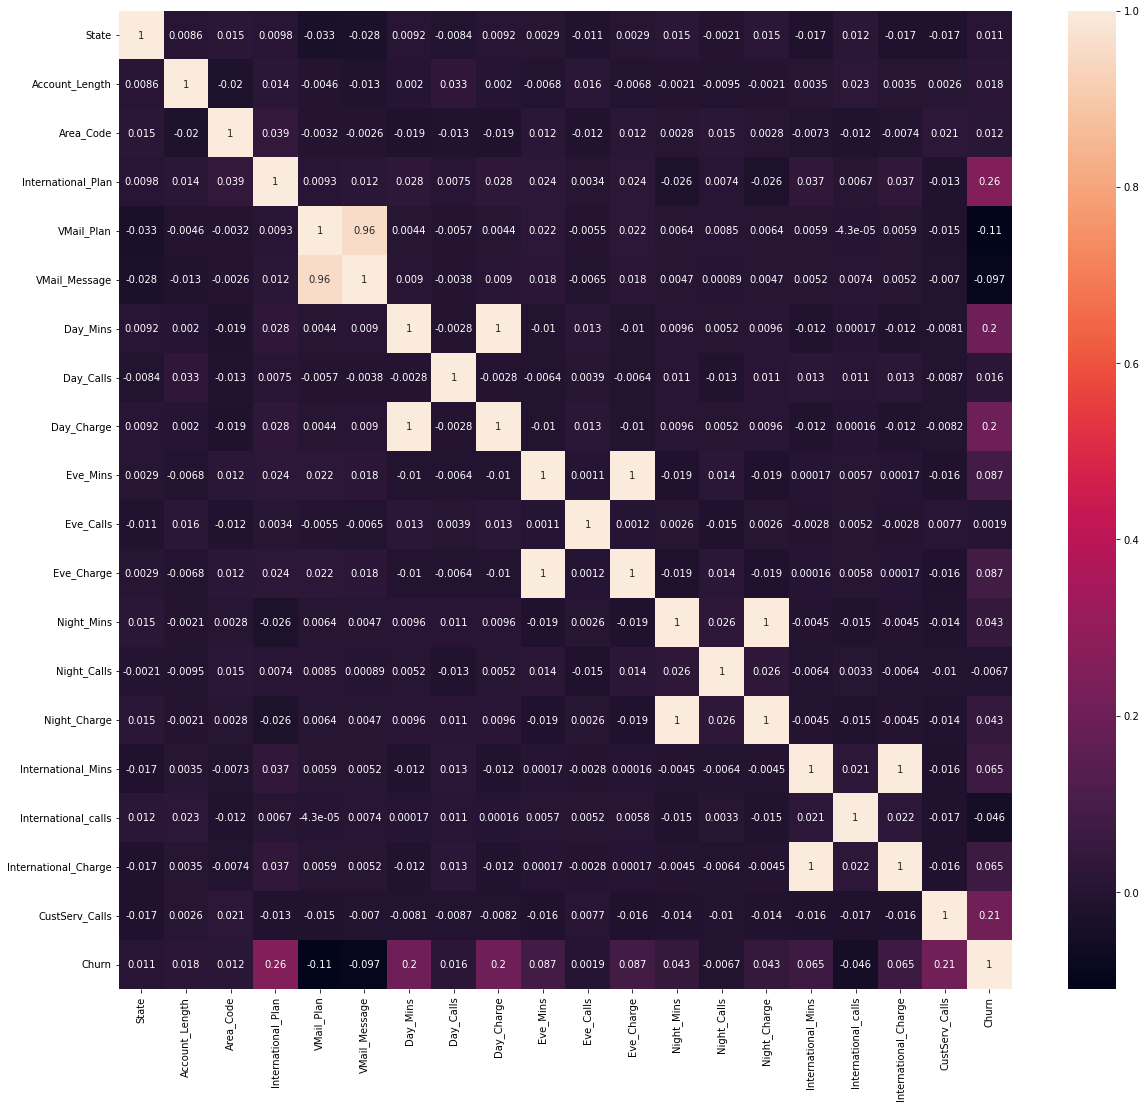

In [57]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [58]:
# Separate features and target
x = df.drop('Churn', axis=1)
y = df['Churn']

In [59]:
import pandas as pd

# Load your dataset
# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

outlier_indices = []

# Loop through each integer column
for col in x.select_dtypes(include=['int32','float32']).columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = (x[col] < lower_bound) | (x[col] > upper_bound)
    # Get the indices of outliers
    outlier_indices.extend(x.index[outliers].tolist())

print("Indices of outliers:", outlier_indices)


Indices of outliers: [197, 238, 309, 416, 817, 1045, 1093, 1387, 1408, 1551, 1751, 1886, 2150, 2259, 2277, 2700, 3216, 3227, 4260, 4342, 4379, 4389, 4395, 3, 4, 5, 7, 9, 38, 41, 66, 67, 81, 115, 135, 144, 147, 180, 184, 198, 211, 214, 230, 231, 234, 241, 254, 258, 269, 276, 279, 319, 351, 354, 356, 358, 360, 372, 378, 382, 383, 405, 408, 416, 425, 444, 465, 486, 491, 492, 495, 498, 502, 503, 514, 529, 542, 546, 547, 553, 567, 569, 572, 586, 601, 613, 616, 619, 626, 679, 708, 715, 716, 734, 735, 737, 749, 762, 766, 771, 773, 777, 779, 780, 781, 783, 790, 792, 797, 808, 826, 830, 837, 842, 851, 869, 877, 893, 900, 933, 957, 985, 987, 1005, 1024, 1027, 1037, 1042, 1044, 1052, 1064, 1083, 1117, 1128, 1136, 1149, 1158, 1161, 1165, 1169, 1191, 1192, 1193, 1204, 1209, 1238, 1242, 1248, 1253, 1258, 1271, 1309, 1322, 1337, 1339, 1346, 1367, 1378, 1388, 1396, 1418, 1420, 1423, 1428, 1435, 1437, 1443, 1467, 1472, 1473, 1483, 1484, 1503, 1531, 1533, 1537, 1539, 1542, 1574, 1588, 1593, 1601, 1602, 

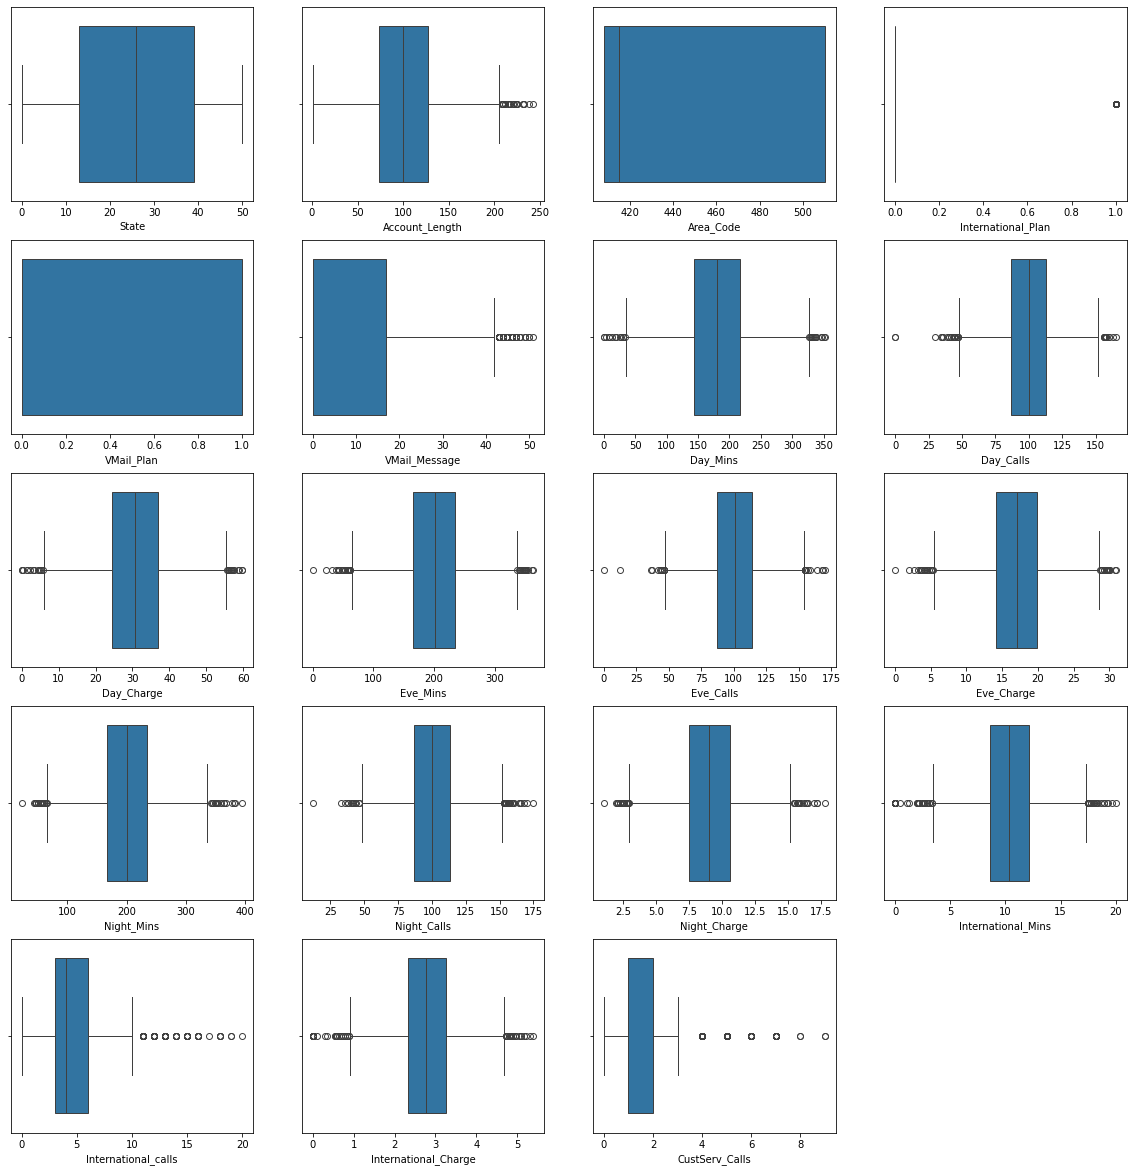

In [60]:
plt.figure(figsize=(20,25))
plotnumber=1

for i in x:
    plt.subplot(6,4,plotnumber)
    sns.boxplot(x=x[i])
    plotnumber+=1

In [61]:
import pandas as pd

# Load your dataset
# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Loop through each integer column
for col in x.select_dtypes(include=['int32','float32']).columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = (x[col] < lower_bound) | (x[col] > upper_bound)
    # Replace outliers with median value of the column
    median_val = x[col].median()
    x.loc[outliers, col] = median_val

# Now df contains treated outliers using the IQR method


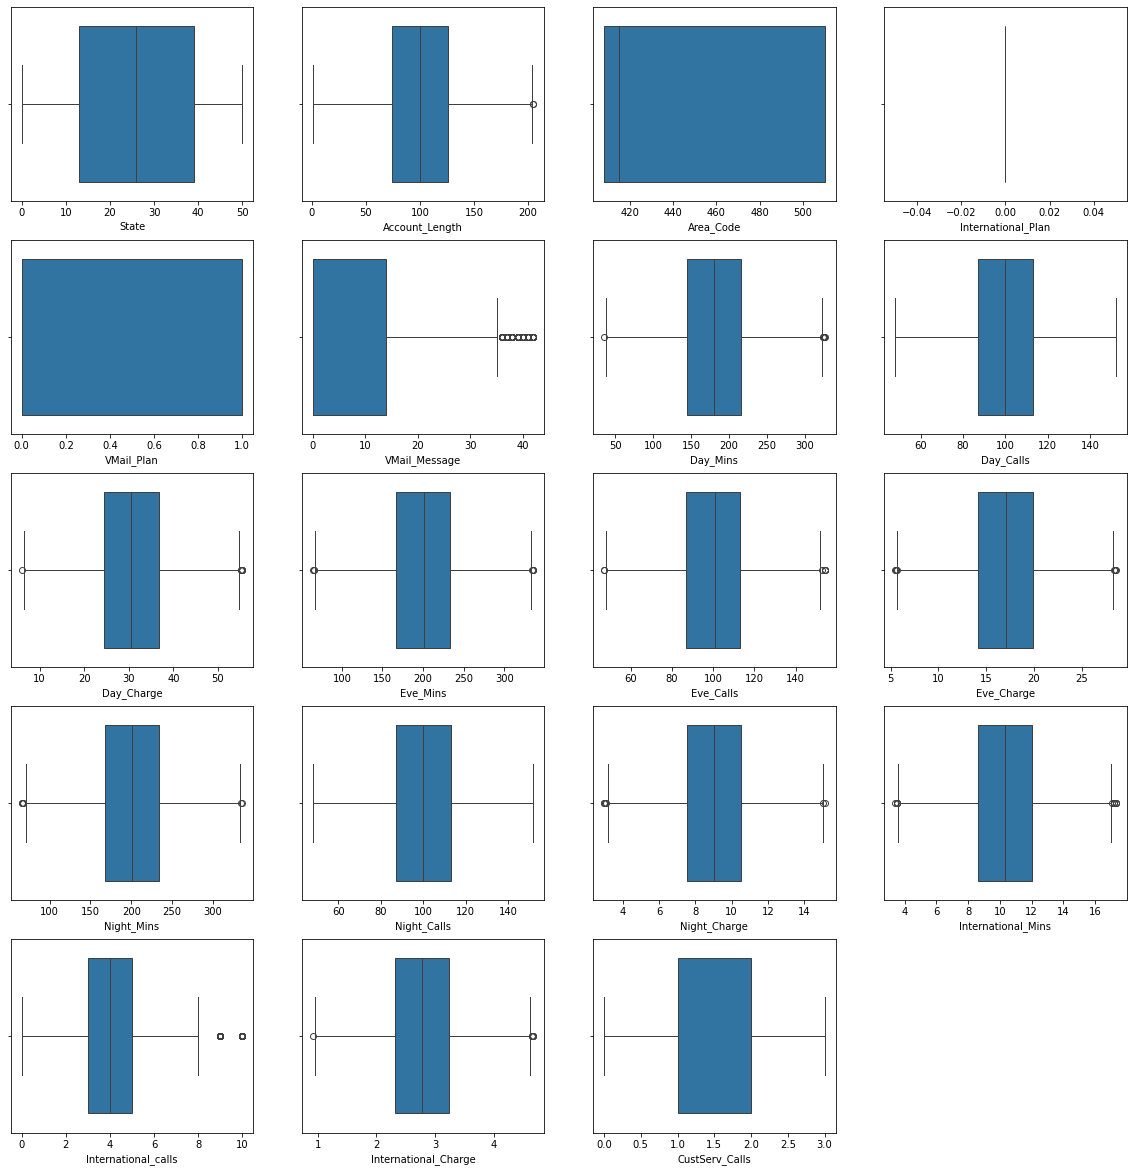

In [62]:
plt.figure(figsize=(20,25))
plotnumber=1

for i in x:
    plt.subplot(6,4,plotnumber)
    sns.boxplot(x=x[i])
    plotnumber+=1

In [63]:
x

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
0,16,128,415,0,1,25,265.100006,110,45.070000,197.399994,99,16.780001,244.699997,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.600006,123,27.469999,195.500000,103,16.620001,254.399994,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.399994,114,41.380001,121.199997,110,10.300000,162.600006,104,7.32,12.2,5,3.29,0
3,35,84,408,0,0,0,299.399994,71,50.900002,200.800003,88,17.070000,196.899994,89,8.86,6.6,7,1.78,2
4,36,75,415,0,0,0,166.699997,113,28.340000,148.300003,122,12.610000,186.899994,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,510,0,1,25,144.000000,81,24.480000,187.199997,112,15.910000,158.600006,122,7.14,8.5,6,2.30,3
4613,32,177,408,0,1,29,189.000000,91,32.130001,303.100006,96,25.760000,163.600006,116,7.36,15.7,1,4.24,3
4614,46,67,408,0,1,33,127.500000,126,21.680000,296.100006,129,25.170000,200.899994,91,9.04,13.0,3,3.51,1
4615,22,98,415,0,1,23,168.899994,98,28.709999,226.300003,117,19.240000,165.500000,96,7.45,14.3,3,3.86,0


In [64]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4612    0
4613    0
4614    0
4615    0
4616    0
Name: Churn, Length: 4617, dtype: int32

In [65]:
from collections import Counter
from imblearn.over_sampling import SMOTE


# Check class distribution before balancing
print("Class distribution before balancing:", Counter(y))

Class distribution before balancing: Counter({0: 3961, 1: 656})


In [66]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Check class distribution after balancing
print("Class distribution after balancing:", Counter(y_resampled))


Class distribution after balancing: Counter({0: 3961, 1: 3961})


In [67]:
y.unique()

array([0, 1])

## droping the unwanted columns

In [68]:
x.drop(['Day_Mins','Eve_Mins','Night_Mins','International_Mins','VMail_Message'], axis=1, inplace=True)

In [69]:
x

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,International_calls,International_Charge,CustServ_Calls
0,16,128,415,0,1,110,45.070000,99,16.780001,91,11.01,3,2.70,1
1,35,107,415,0,1,123,27.469999,103,16.620001,103,11.45,3,3.70,1
2,31,137,415,0,0,114,41.380001,110,10.300000,104,7.32,5,3.29,0
3,35,84,408,0,0,71,50.900002,88,17.070000,89,8.86,7,1.78,2
4,36,75,415,0,0,113,28.340000,122,12.610000,121,8.41,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,510,0,1,81,24.480000,112,15.910000,122,7.14,6,2.30,3
4613,32,177,408,0,1,91,32.130001,96,25.760000,116,7.36,1,4.24,3
4614,46,67,408,0,1,126,21.680000,129,25.170000,91,9.04,3,3.51,1
4615,22,98,415,0,1,98,28.709999,117,19.240000,96,7.45,3,3.86,0


In [74]:
x.columns

Index(['State', 'Account_Length', 'Area_Code', 'International_Plan',
       'VMail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'International_calls',
       'International_Charge', 'CustServ_Calls'],
      dtype='object')

### Data Scaling

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [71]:
x_scaled

array([[-0.67900123,  0.72280374, -0.52139206, ..., -0.59666095,
        -0.12778361, -0.30254327],
       [ 0.60575838,  0.17979365, -0.52139206, ..., -0.59666095,
         1.32647275, -0.30254327],
       [ 0.33528267,  0.95552234, -0.52139206, ...,  0.37521543,
         0.73022751, -1.36720962],
       ...,
       [ 1.34956657, -0.85451128, -0.68694075, ..., -0.59666095,
         1.05016395, -0.30254327],
       [-0.27328767, -0.05292496, -0.52139206, ..., -0.59666095,
         1.55915354, -1.36720962],
       [-0.74662015,  1.03309521, -0.52139206, ..., -0.11072276,
         0.70114241,  0.76212309]])

In [75]:
x =pd.DataFrame(x_scaled,columns=['State', 'Account_Length', 'Area_Code', 'International_Plan',
       'VMail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'International_calls',
       'International_Charge', 'CustServ_Calls'])

In [76]:
y.value_counts()

Churn
0    3961
1     656
Name: count, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [79]:
x_train

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,International_calls,International_Charge,CustServ_Calls
575,1.011472,0.360797,-0.521392,0.0,1.653916,-0.532189,2.461773,-0.581058,-0.004804,0.271116,-0.351122,-1.082599,1.515526,-0.302543
3877,0.673377,0.877949,-0.686941,0.0,1.653916,-1.106269,-0.401283,-0.321780,-2.247554,1.946807,-0.022390,-0.596661,-0.127784,0.762123
2441,-1.017096,0.283224,-0.686941,0.0,1.653916,0.198459,0.240051,-0.114358,-1.825077,-0.304903,0.548327,-0.110723,0.701142,-0.302543
4467,1.079091,-0.182213,-0.686941,0.0,-0.604626,1.816321,-0.156165,-0.269925,2.423837,0.218750,-1.419503,-0.110723,0.468461,1.826789
4414,-1.219953,-1.294091,1.725340,0.0,1.653916,-1.315025,-0.631849,-1.358891,0.907747,0.061654,0.333738,-0.596661,1.122877,0.762123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,-1.625666,0.826234,-0.521392,0.0,-0.604626,1.346619,-1.550758,-1.255180,-0.229320,0.428212,-0.912707,-0.596661,-0.753114,-0.302543
4473,-0.070431,-0.621793,-0.686941,0.0,-0.604626,-0.949701,0.237812,0.456052,0.004853,-1.090383,-1.328189,-0.596661,1.602782,-1.367210
580,-0.746620,0.334939,-0.521392,0.0,-0.604626,2.651346,0.550084,0.663474,0.004853,0.847135,0.931848,-1.082599,-1.145763,-0.302543
163,-0.273288,-0.983799,-0.521392,0.0,-0.604626,0.146270,-1.552997,1.130174,-1.337417,-0.933287,0.740087,-1.568537,0.730228,-0.302543


In [80]:
x_test

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,International_calls,International_Charge,CustServ_Calls
3544,1.417185,0.153936,-0.521392,0.0,-0.604626,0.720350,-0.585960,-1.462602,-1.972340,-0.671461,0.562024,-1.082599,-0.520433,0.762123
2409,-1.219953,2.144973,-0.521392,0.0,1.653916,0.981295,-1.788040,-0.166214,1.735802,1.737346,-0.415043,-1.082599,-0.636774,0.762123
1700,1.349567,-0.182213,1.725340,0.0,1.653916,0.876917,0.726927,-2.033012,-1.755066,-0.776191,-0.163927,0.375215,-0.360465,0.762123
2976,-1.625666,0.567658,-0.521392,0.0,-0.604626,0.876917,-0.650876,-0.373636,0.371805,-0.147807,0.726390,0.375215,0.468461,-0.302543
2944,0.808615,0.929665,-0.686941,0.0,-0.604626,-1.315025,-1.491437,-0.166214,0.388704,-0.409634,-2.606593,0.375215,-0.200496,-1.367210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,-0.340907,-0.570077,-0.521392,0.0,-0.604626,-0.375621,1.377215,0.611619,-0.456251,0.271116,1.301672,1.347092,-0.316837,1.826789
1653,-0.408526,-0.182213,1.725340,0.0,-0.604626,-1.158458,-0.934048,0.300486,0.391118,0.166385,-0.921839,-1.082599,0.308493,-0.302543
1796,1.146710,-0.544220,-0.521392,0.0,-0.604626,-0.532189,-0.694528,-0.477347,-1.330175,1.527884,0.242423,-0.110723,1.050164,-0.302543
1453,1.214329,0.128078,-0.521392,0.0,1.653916,0.563782,1.066061,0.507908,-1.714026,0.794769,0.420486,-0.596661,-0.869454,0.762123


In [81]:
y_train

575     0
3877    0
2441    0
4467    0
4414    0
       ..
3704    0
4473    0
580     1
163     0
3616    1
Name: Churn, Length: 3693, dtype: int32

In [82]:
y_test

3544    0
2409    0
1700    0
2976    0
2944    0
       ..
93      0
1653    1
1796    0
1453    0
1400    0
Name: Churn, Length: 924, dtype: int32

In [83]:
df.corr()

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
State,1.000000,0.008638,0.015370,0.009789,-0.033323,-0.028491,0.009172,-0.008418,0.009173,0.002927,-0.010696,0.002920,0.014747,-0.002134,0.014735,-0.017423,0.012466,-0.017464,-0.016943,0.010979
Account_Length,0.008638,1.000000,-0.020394,0.013948,-0.004602,-0.012983,0.002002,0.032783,0.001999,-0.006778,0.015598,-0.006775,-0.002077,-0.009482,-0.002095,0.003483,0.023485,0.003501,0.002620,0.018046
Area_Code,0.015370,-0.020394,1.000000,0.039263,-0.003150,-0.002597,-0.018900,-0.013179,-0.018903,0.011513,-0.011528,0.011533,0.002794,0.015316,0.002782,-0.007292,-0.011531,-0.007386,0.021046,0.011995
International_Plan,0.009789,0.013948,0.039263,1.000000,0.009278,0.011596,0.028220,0.007477,0.028223,0.023740,0.003360,0.023740,-0.025951,0.007390,-0.025959,0.036973,0.006717,0.036955,-0.012846,0.257524
VMail_Plan,-0.033323,-0.004602,-0.003150,0.009278,1.000000,0.955280,0.004444,-0.005738,0.004441,0.021775,-0.005534,0.021779,0.006431,0.008468,0.006426,0.005872,-0.000043,0.005912,-0.014544,-0.110149
VMail_Message,-0.028491,-0.012983,-0.002597,0.011596,0.955280,1.000000,0.009028,-0.003846,0.009025,0.017872,-0.006508,0.017878,0.004672,0.000889,0.004665,0.005167,0.007423,0.005202,-0.006951,-0.096884
Day_Mins,0.009172,0.002002,-0.018900,0.028220,0.004444,0.009028,1.000000,-0.002823,1.000000,-0.010260,0.012990,-0.010268,0.009604,0.005165,0.009591,-0.012314,0.000166,-0.012261,-0.008149,0.202439
Day_Calls,-0.008418,0.032783,-0.013179,0.007477,-0.005738,-0.003846,-0.002823,1.000000,-0.002821,-0.006430,0.003923,-0.006429,0.010730,-0.013299,0.010724,0.012951,0.010889,0.013055,-0.008747,0.016268
Day_Charge,0.009173,0.001999,-0.018903,0.028223,0.004441,0.009025,1.000000,-0.002821,1.000000,-0.010255,0.012992,-0.010262,0.009606,0.005164,0.009593,-0.012315,0.000163,-0.012262,-0.008155,0.202434
Eve_Mins,0.002927,-0.006778,0.011513,0.023740,0.021775,0.017872,-0.010260,-0.006430,-0.010255,1.000000,0.001135,1.000000,-0.018830,0.014226,-0.018837,0.000165,0.005749,0.000172,-0.015598,0.087042


# Model Creation

## 1) Linear Regression

In [84]:
lr =LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [86]:
# Make predictions on the test data
y_test_pred = lr.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Testin Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testin Accuracy: 0.86
Confusion Matrix:
[[792   0]
 [130   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       792
           1       1.00      0.02      0.03       132

    accuracy                           0.86       924
   macro avg       0.93      0.51      0.48       924
weighted avg       0.88      0.86      0.80       924



In [87]:
# Make predictions on the train data
y_train_pred = lr.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.86
Confusion Matrix:
[[3169    0]
 [ 503   21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      3169
           1       1.00      0.04      0.08       524

    accuracy                           0.86      3693
   macro avg       0.93      0.52      0.50      3693
weighted avg       0.88      0.86      0.81      3693



## 2) Random forest

In [88]:
rf_c =RandomForestClassifier()
rf_c.fit(x_train,y_train)

RandomForestClassifier()

In [89]:
# Make predictions on the test data
y_test_pred = rf_c.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Testin Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testin Accuracy: 0.89
Confusion Matrix:
[[788   4]
 [101  31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       792
           1       0.89      0.23      0.37       132

    accuracy                           0.89       924
   macro avg       0.89      0.61      0.65       924
weighted avg       0.89      0.89      0.86       924



In [90]:
# Make predictions on the train data
y_train_pred = rf_c.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 1.00
Confusion Matrix:
[[3169    0]
 [   0  524]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3169
           1       1.00      1.00      1.00       524

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693



## 3) Gradient Boosting

In [91]:
GB =GradientBoostingClassifier()
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [92]:
# Make predictions on the test data
y_test_pred = GB.predict(x_test)

# Evaluation matrics to evaluate trained model on test dataset
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Testing Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Testing Accuracy: 0.89
Confusion Matrix:
[[783   9]
 [ 96  36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       792
           1       0.80      0.27      0.41       132

    accuracy                           0.89       924
   macro avg       0.85      0.63      0.67       924
weighted avg       0.88      0.89      0.86       924



In [93]:
# Make predictions on the train data
y_train_pred = GB.predict(x_train)

# Evaluation matrics to evaluate trained model on train dataset
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f"Training Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Training Accuracy: 0.91
Confusion Matrix:
[[3160    9]
 [ 319  205]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3169
           1       0.96      0.39      0.56       524

    accuracy                           0.91      3693
   macro avg       0.93      0.69      0.75      3693
weighted avg       0.92      0.91      0.89      3693

